In [3]:
##### Load Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

# Step1 : Loading the Dataset

In [4]:
##### load the Datasets
Loan_Dataset=pd.read_csv('loan_prediction.csv')

In [5]:
Loan_Dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


                                                                                                                               Analysis: There is only 1 data set, which needs to be train & test with the help of the actual target variable as ‘Loan     Status’. Train file will be used for training the model, i.e. the model will learn from this file.

     It contains all the independent variables and the target variable. Size of training set: 614 rows & 13 columns.

# Step2 : EDA(Exploratory Data Analysis) and Visualization

In [6]:
# Handling Missing values:
Loan_Dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

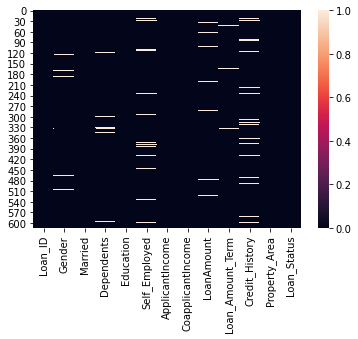

In [7]:
#### see Null Value using Heatmap visualization
sns.heatmap(Loan_Dataset.isnull())

##### seems to be null value with white space is showing

In [8]:
##### check the shape of datasets
Loan_Dataset.shape

(614, 13)

#### rows = 614 and columns = 13

In [9]:
##### check the statistical information 
Loan_Dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# step 3: understanding the data at a high level. Checking the statistics of the data set:

In [10]:
#### check the statistical summary
Loan_Dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



Findings:

· For a few features standard deviation is far from the mean, it may be because of data is more scattered.

· Co-applicant is having a minimum income of zero.

· Maximum loan applied is 700 having a minimum term of 480.

· Minimum loan applied is 9 having minimum term 12.

· Missing values in the Loan amount, loan amount term & credit history.


In [11]:
#### see the columns name present in datasets
Loan_Dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Step 4: Visualize the each columns with loan approval

<AxesSubplot:xlabel='Gender', ylabel='count'>

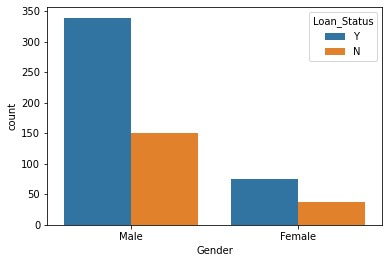

In [12]:
sns.countplot(x='Gender',hue='Loan_Status',data=Loan_Dataset)

     Findings :The maximum loan was approved & not approved for male-only & the total count of males is higher than females.

<AxesSubplot:xlabel='Married', ylabel='count'>

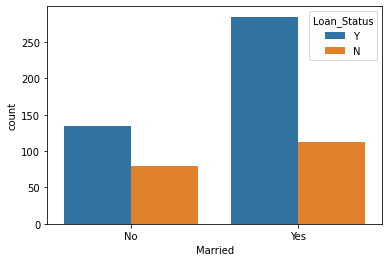

In [13]:
sns.countplot(x='Married',hue='Loan_Status',data=Loan_Dataset)

       Findings: The maximum loan was approved & not approved for Married only & the total count of Married is higher than                        Unmarried.


<AxesSubplot:xlabel='Dependents', ylabel='count'>

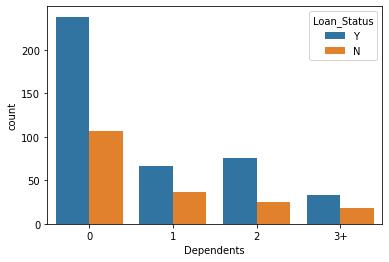

In [14]:
sns.countplot(x='Dependents',hue='Loan_Status',data=Loan_Dataset)

     Findings: 0 dependents have more loan approval & have more count for both loan statuses.


<AxesSubplot:xlabel='Education', ylabel='count'>

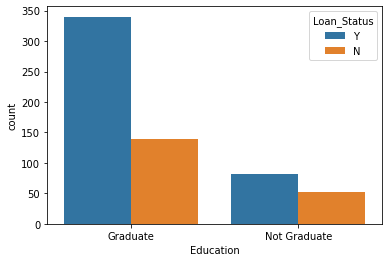

In [15]:
sns.countplot(x='Education',hue='Loan_Status',data=Loan_Dataset)

Findings: Graduates have more chances of getting loans approved.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

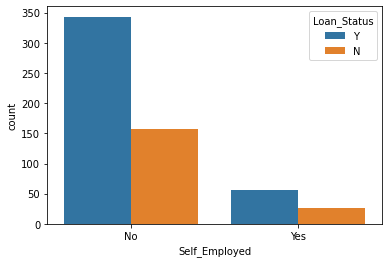

In [16]:

sns.countplot(x='Self_Employed',hue='Loan_Status',data=Loan_Dataset)

    Findings: Self-employed people have fewer chances of getting loans approved.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

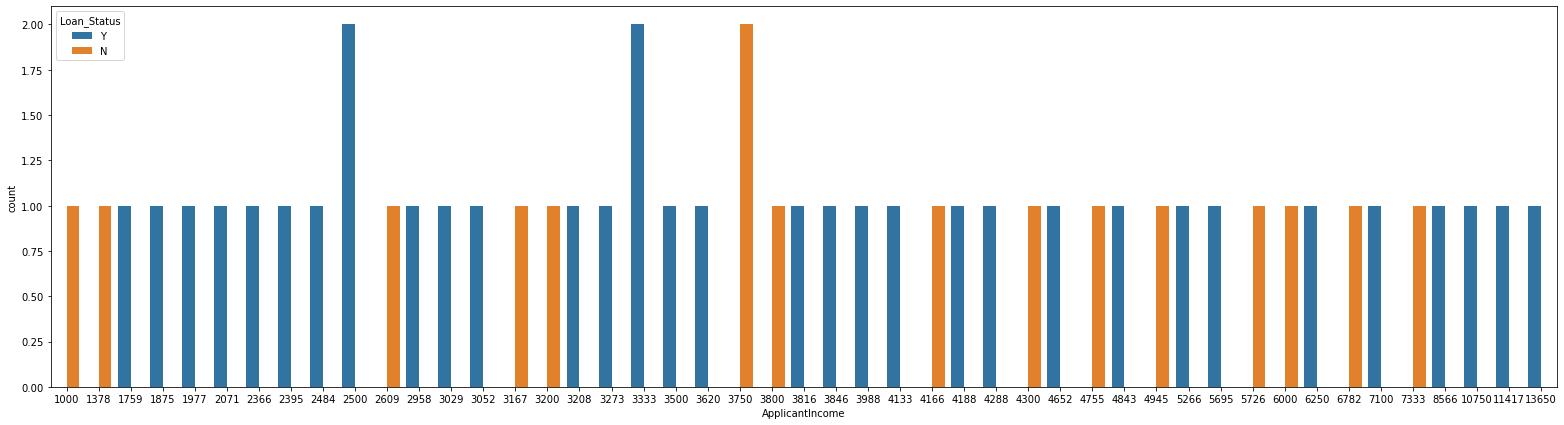

In [17]:
plt.figure(figsize=(27,7))
sns.countplot(x='ApplicantIncome',hue='Loan_Status',data=Loan_Dataset[60:110])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

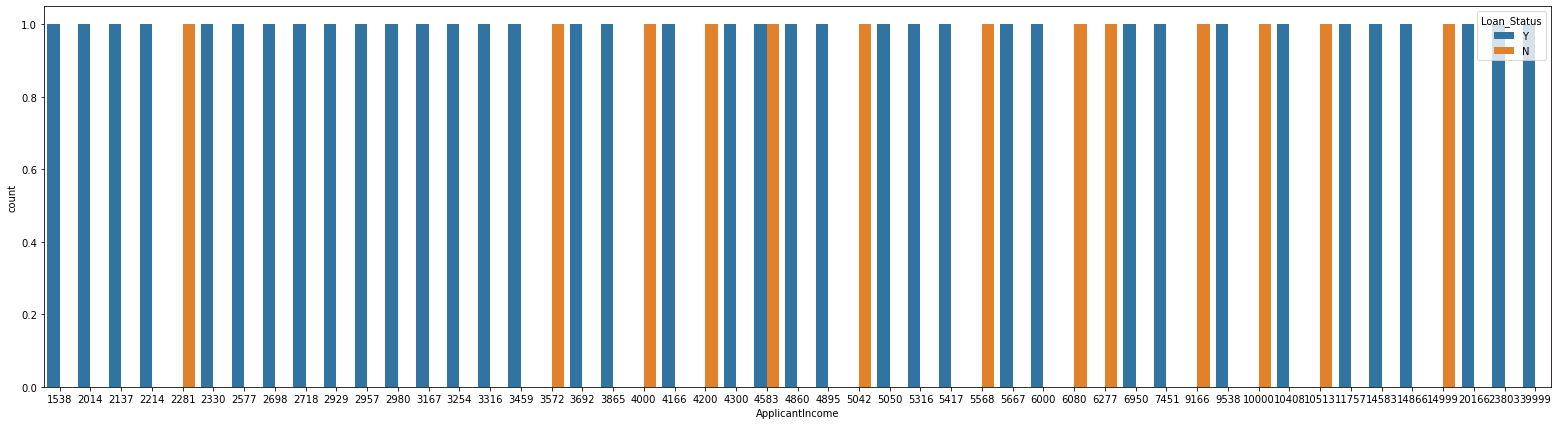

In [18]:
plt.figure(figsize=(27,7))
sns.countplot(x='ApplicantIncome',hue='Loan_Status',data=Loan_Dataset[110:160])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

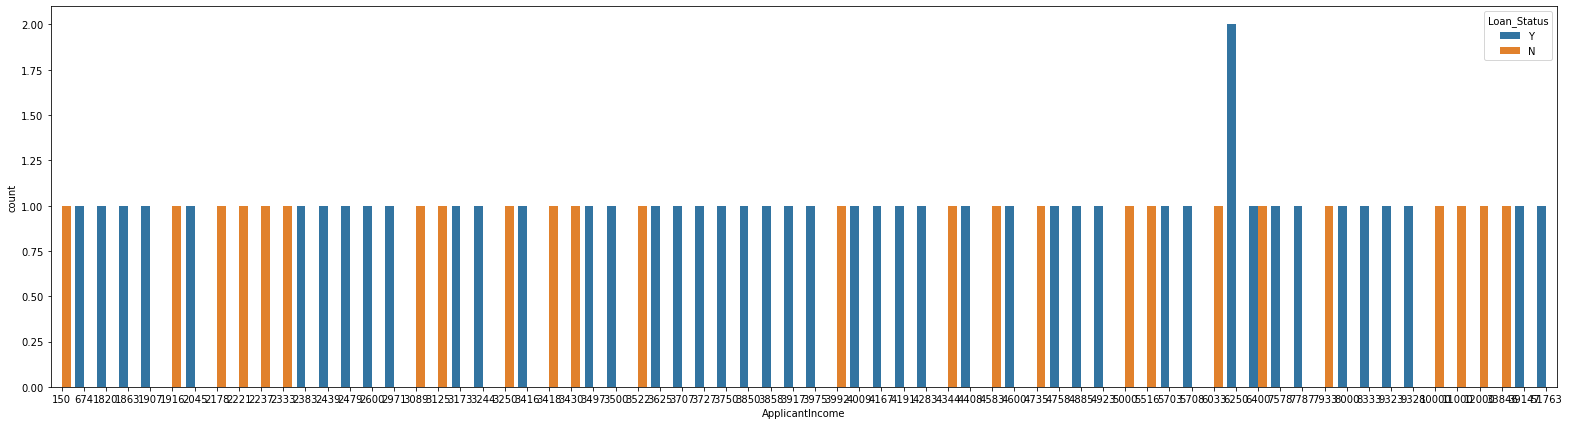

In [19]:
plt.figure(figsize=(27,7))
sns.countplot(x='ApplicantIncome',hue='Loan_Status',data=Loan_Dataset[160:230])

In [20]:
Loan_Dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

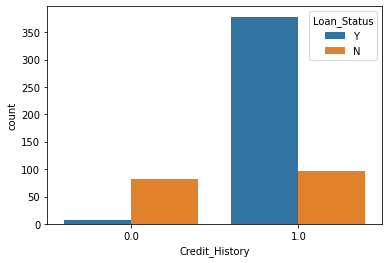

In [21]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=Loan_Dataset)

  Findings: credit History 1 have the loan approval count is max in number

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

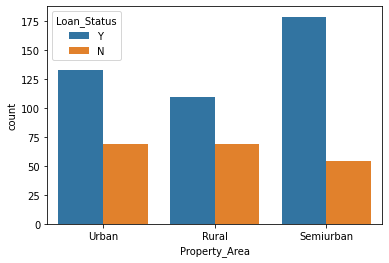

In [22]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=Loan_Dataset)

 Findings: Semi Urban has maximum loan approval count intead of urban and Rural

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

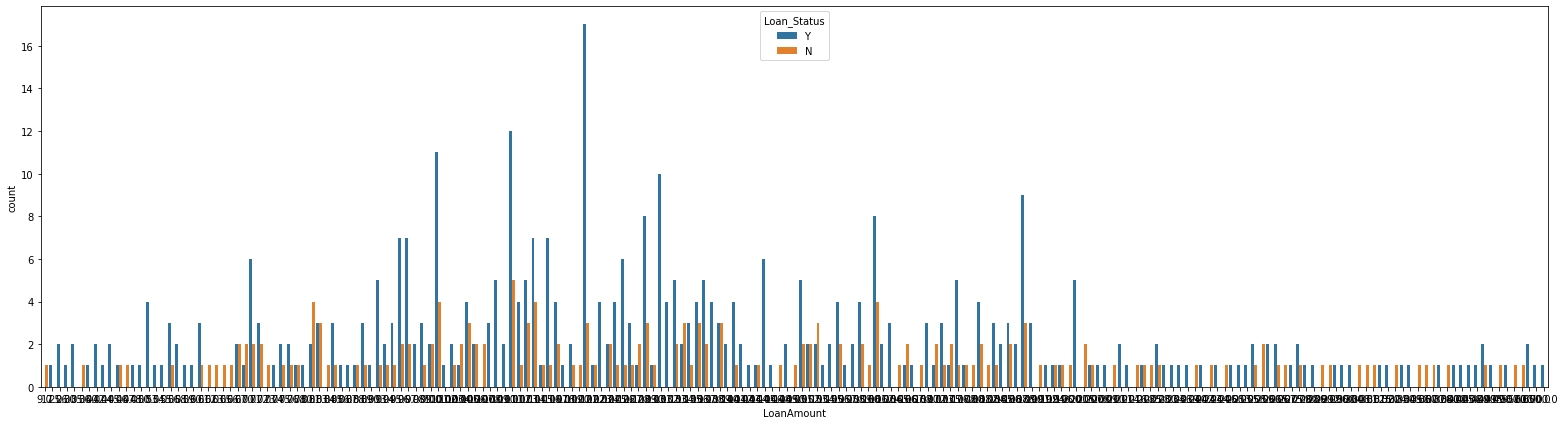

In [23]:
plt.figure(figsize=(27,7))
sns.countplot(x='LoanAmount',hue='Loan_Status',data=Loan_Dataset)

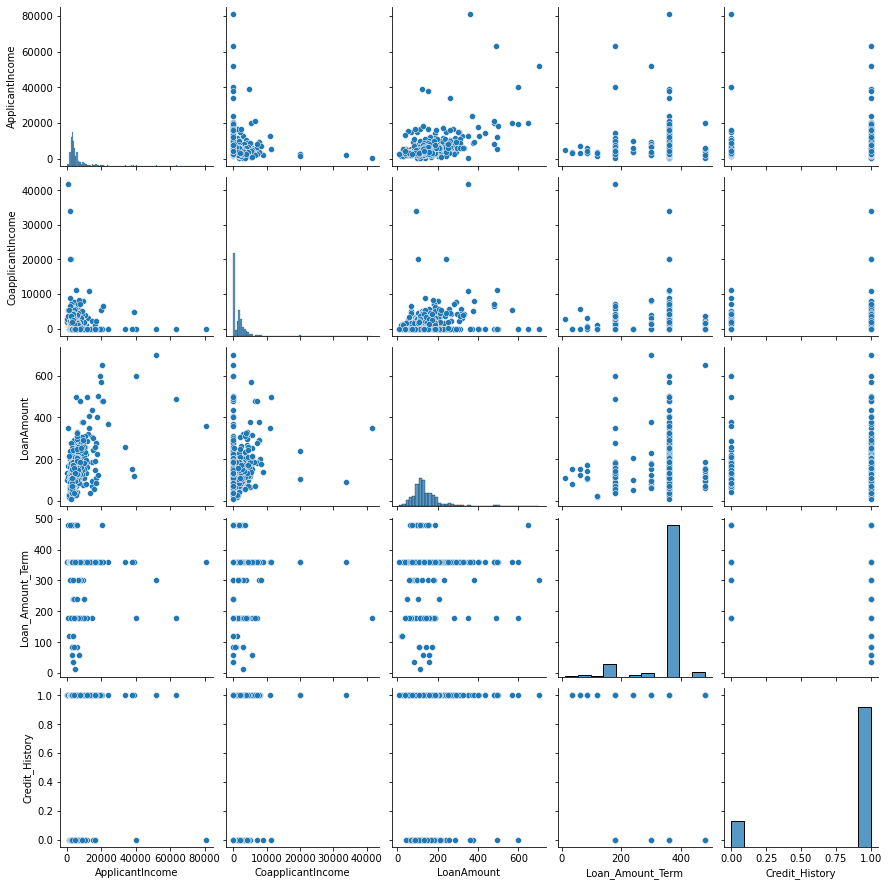

In [24]:
sns.pairplot(Loan_Dataset)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

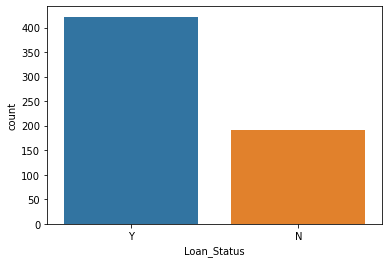

In [25]:
##### Target valribale COunt
sns.countplot(Loan_Dataset['Loan_Status'])

In [26]:
Loan_Dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

##### class imbalance is showing 

In [27]:
cor=Loan_Dataset.corr()

In [28]:
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

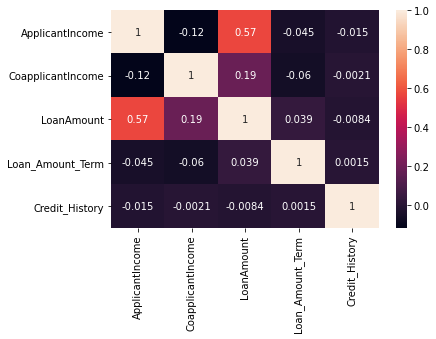

In [29]:
sns.heatmap(cor,annot=True)

#### Loan Amount with Applicant Income showing good co realtionship

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

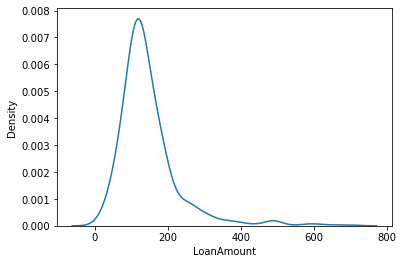

In [30]:
sns.kdeplot(Loan_Dataset['LoanAmount'])

##### Right Skewness

# Step 5 Preprocessing And Feature Engineering

In [31]:
Loan_Dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
#Imputing the missing value for gender
Loan_Dataset['Gender'].fillna(Loan_Dataset['Gender'].mode()[0],inplace=True)

In [33]:
#Imputing the missing value for Married
Loan_Dataset['Married'].fillna(Loan_Dataset['Married'].mode()[0],inplace=True)

In [34]:
#Imputing the missing value for Self-employed
Loan_Dataset['Self_Employed'].fillna(Loan_Dataset['Self_Employed'].mode()[0],inplace=True)

In [35]:
#Imputing the missing value for Dependents
Loan_Dataset['Dependents'].fillna(Loan_Dataset['Dependents'].mode()[0],inplace=True)

In [36]:
##Imputing the missing value for LoanAmount
Loan_Dataset['LoanAmount'].fillna(Loan_Dataset['LoanAmount'].mean(),inplace=True)

In [37]:
#Imputing the missing value for Loan_Amount_Term
Loan_Dataset['Loan_Amount_Term'].fillna(Loan_Dataset['Loan_Amount_Term'].mean(),inplace=True)

In [38]:
#Imputing the missing value for Credit_History
Loan_Dataset['Credit_History'].fillna(Loan_Dataset['Credit_History'].mode()[0],inplace=True)

# Step 6: Understanding the distribution of continuous features:


##### Check for Outliers for Applicant Income and Loan Amount

<AxesSubplot:>

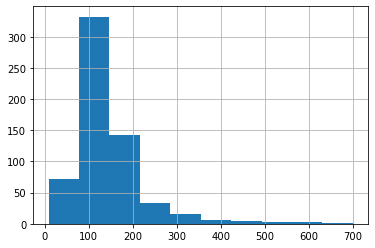

In [41]:
Loan_Dataset['LoanAmount'].hist()

In [42]:
#### seems to be right skewed

<AxesSubplot:xlabel='LoanAmount'>

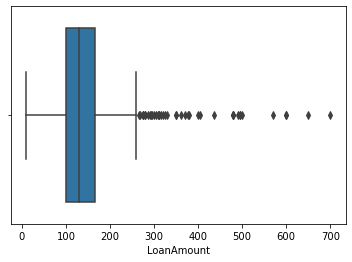

In [43]:
sns.boxplot(Loan_Dataset['LoanAmount'])

#### seems to outlier but it is possible that need of large amount is not approved for them so it better to dont not to treat outliers just tarnsform the skewness

In [44]:
Loan_Dataset.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [45]:
Loan_Dataset['LoanAmount']=np.log(Loan_Dataset['LoanAmount'])

<AxesSubplot:>

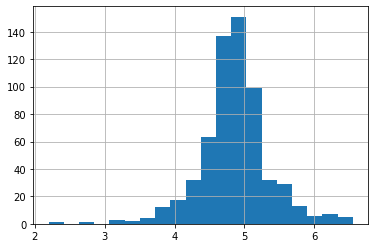

In [46]:
Loan_Dataset['LoanAmount'].hist(bins=20)

In [47]:
#### Noraml DIstibution 

In [48]:
Loan_Dataset['Total_income']=Loan_Dataset['ApplicantIncome'] + Loan_Dataset['CoapplicantIncome']

In [49]:
Loan_Dataset.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [50]:
Loan_Dataset.skew()

LoanAmount         -0.223227
Loan_Amount_Term   -2.389680
Credit_History     -2.021971
Total_income        5.633449
dtype: float64

<AxesSubplot:>

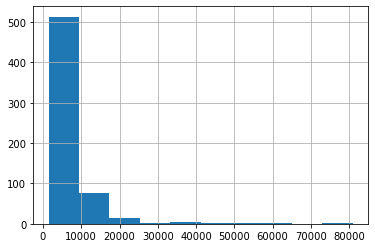

In [51]:
Loan_Dataset['Total_income'].hist()

In [52]:
#### seemms to be right skeweed

In [53]:
Loan_Dataset['Total_income']=np.log(Loan_Dataset['Total_income'])

<AxesSubplot:>

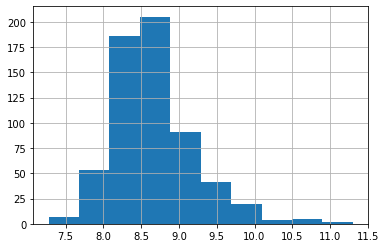

In [54]:
Loan_Dataset['Total_income'].hist()

# Step 7 Normal Distribution

In [55]:
##### Scaling Techniques
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
Loan_Dataset['Gender']=le.fit_transform(Loan_Dataset['Gender'])
Loan_Dataset['Married']=le.fit_transform(Loan_Dataset['Married'])
Loan_Dataset['Dependents']=le.fit_transform(Loan_Dataset['Dependents'])
Loan_Dataset['Education']=le.fit_transform(Loan_Dataset['Education'])
Loan_Dataset['Self_Employed']=le.fit_transform(Loan_Dataset['Self_Employed'])
Loan_Dataset['Credit_History']=le.fit_transform(Loan_Dataset['Credit_History'])
Loan_Dataset['Property_Area']=le.fit_transform(Loan_Dataset['Property_Area'])

In [57]:
Loan_Dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,1,0,0,0,0,4.986426,360.0,1,2,Y,8.674026
1,LP001003,1,1,1,0,0,4.852030,360.0,1,0,N,8.714568
2,LP001005,1,1,0,0,1,4.189655,360.0,1,2,Y,8.006368
3,LP001006,1,1,0,1,0,4.787492,360.0,1,2,Y,8.505323
4,LP001008,1,0,0,0,0,4.948760,360.0,1,2,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,4.262680,360.0,1,0,Y,7.972466
610,LP002979,1,1,3,0,0,3.688879,180.0,1,0,Y,8.320205
611,LP002983,1,1,1,0,0,5.533389,360.0,1,2,Y,9.025456
612,LP002984,1,1,2,0,0,5.231109,360.0,1,2,Y,8.933664


In [58]:
Loan_Dataset.dtypes

Loan_ID              object
Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History        int64
Property_Area         int32
Loan_Status          object
Total_income        float64
dtype: object

In [59]:
Loan_Dataset['Loan_Status']=le.fit_transform(Loan_Dataset['Loan_Status'])

In [60]:
####
Loan_Dataset.drop(['Loan_ID'],axis=1,inplace=True)

In [61]:
Loan_Dataset

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1,0,0,0,0,4.986426,360.0,1,2,1,8.674026
1,1,1,1,0,0,4.852030,360.0,1,0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1,2,1,8.006368
3,1,1,0,1,0,4.787492,360.0,1,2,1,8.505323
4,1,0,0,0,0,4.948760,360.0,1,2,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,360.0,1,0,1,7.972466
610,1,1,3,0,0,3.688879,180.0,1,0,1,8.320205
611,1,1,1,0,0,5.533389,360.0,1,2,1,9.025456
612,1,1,2,0,0,5.231109,360.0,1,2,1,8.933664


# Step 8 : Training and Model Building

In [63]:
##### split into target and feature
x=Loan_Dataset.drop(['Loan_Status'],axis=1)
y=Loan_Dataset['Loan_Status']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [66]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    classifier=LogisticRegression()
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=1
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)

Best accuracy - 0.8701298701298701 Best Random state =  1


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)
confusion_matrix = confusion_matrix(y_test,pred)
print('Accuracy Score :', accu)
print('Classification Score :', classification_score)
print('confusion Matrix :', confusion_matrix)

Accuracy Score : 0.8051948051948052
Classification Score :               precision    recall  f1-score   support

           0       0.91      0.43      0.58        49
           1       0.79      0.98      0.87       105

    accuracy                           0.81       154
   macro avg       0.85      0.70      0.73       154
weighted avg       0.83      0.81      0.78       154

confusion Matrix : [[ 21  28]
 [  2 103]]


In [69]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)
#confusion_matrix = confusion_matrix(y_test,pred)
print('Accuracy Score :', accu)
print('Classification Score :', classification_score)
#print('confusion Matrix :', confusion_matrix)

Accuracy Score : 0.6753246753246753
Classification Score :               precision    recall  f1-score   support

           0       0.49      0.49      0.49        49
           1       0.76      0.76      0.76       105

    accuracy                           0.68       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.68      0.68      0.68       154



In [70]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.7597402597402597
Classification Score :               precision    recall  f1-score   support

           0       0.70      0.43      0.53        49
           1       0.77      0.91      0.84       105

    accuracy                           0.76       154
   macro avg       0.74      0.67      0.69       154
weighted avg       0.75      0.76      0.74       154



In [71]:
AD=AdaBoostClassifier(n_estimators=100)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.8181818181818182
Classification Score :               precision    recall  f1-score   support

           0       0.82      0.55      0.66        49
           1       0.82      0.94      0.88       105

    accuracy                           0.82       154
   macro avg       0.82      0.75      0.77       154
weighted avg       0.82      0.82      0.81       154



In [72]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.7467532467532467
Classification Score :               precision    recall  f1-score   support

           0       0.63      0.49      0.55        49
           1       0.78      0.87      0.82       105

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [73]:
#### Cross Validation
from sklearn.model_selection import cross_val_score

In [74]:
print('Decission Tree :',cross_val_score(DTC,x,y,cv=5).mean())

Decission Tree : 0.6889510862321738


In [75]:
print('Random Forest :',cross_val_score(RF,x,y,cv=5).mean())

Random Forest : 0.7769159003065441


In [76]:
print('Logistic Regression: ',cross_val_score(classifier,x,y,cv=5).mean())

Logistic Regression:  0.809462881514061


In [77]:
print('Adaboost Tree  :',cross_val_score(AD,x,y,cv=5).mean())

Adaboost Tree  : 0.783406637345062


In [78]:
print('Extra Tree  CLassifier:',cross_val_score(ETC,x,y,cv=5).mean())

Extra Tree  CLassifier: 0.74922031187525


Analysis: After trying different models i have found here that Logistic Regression works as best model ....

# Step 9: lets Hyper tune the model for better accurracy

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [81]:
GCV=GridSearchCV(LogisticRegression(),param_grid,cv=5)
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [82]:
GCV.best_params_

{'C': 0.4393970560760795}

In [83]:
Final_model=LogisticRegression(C=0.4393970560760795)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

80.51948051948052


In [84]:
##### Auc And Roc

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [85]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [86]:
y_pred_prob

array([0.76696421, 0.87991545, 0.75461527, 0.62045993, 0.71360122,
       0.79791817, 0.74781906, 0.81735697, 0.80078135, 0.79529826,
       0.80437255, 0.77100455, 0.7704308 , 0.16055628, 0.72727078,
       0.85565164, 0.85432294, 0.87554114, 0.69296609, 0.15763411,
       0.82389848, 0.68932259, 0.13250141, 0.81941669, 0.18113397,
       0.80656373, 0.81167811, 0.79738637, 0.80605774, 0.81637137,
       0.84207876, 0.68053139, 0.79776008, 0.81280176, 0.15978215,
       0.82008647, 0.77350886, 0.74828274, 0.07407819, 0.67375729,
       0.82684165, 0.76872886, 0.81795205, 0.87689469, 0.12015687,
       0.70797113, 0.8162713 , 0.80812374, 0.08694226, 0.74236383,
       0.73417331, 0.67044706, 0.80733737, 0.79625767, 0.86411474,
       0.66198051, 0.71039815, 0.26764425, 0.62155314, 0.73775705,
       0.86104217, 0.70864536, 0.68166783, 0.14950651, 0.81274644,
       0.80238309, 0.75233153, 0.71066896, 0.77939794, 0.818668  ,
       0.61150916, 0.7830279 , 0.79632874, 0.83587469, 0.65625

In [87]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [88]:
fpr

array([0.        , 0.02040816, 0.02040816, 0.04081633, 0.04081633,
       0.06122449, 0.06122449, 0.08163265, 0.08163265, 0.10204082,
       0.10204082, 0.12244898, 0.12244898, 0.14285714, 0.14285714,
       0.16326531, 0.16326531, 0.18367347, 0.18367347, 0.20408163,
       0.20408163, 0.2244898 , 0.2244898 , 0.24489796, 0.24489796,
       0.26530612, 0.26530612, 0.28571429, 0.28571429, 0.30612245,
       0.30612245, 0.32653061, 0.32653061, 0.34693878, 0.34693878,
       0.36734694, 0.36734694, 0.3877551 , 0.3877551 , 0.44897959,
       0.44897959, 0.46938776, 0.46938776, 0.48979592, 0.48979592,
       0.51020408, 0.51020408, 0.55102041, 0.55102041, 0.57142857,
       0.57142857, 0.73469388, 0.73469388, 0.89795918, 0.89795918,
       1.        ])

In [89]:
tpr

array([0.        , 0.        , 0.01904762, 0.01904762, 0.04761905,
       0.04761905, 0.06666667, 0.06666667, 0.12380952, 0.12380952,
       0.16190476, 0.16190476, 0.19047619, 0.19047619, 0.32380952,
       0.32380952, 0.48571429, 0.48571429, 0.52380952, 0.52380952,
       0.53333333, 0.53333333, 0.59047619, 0.59047619, 0.61904762,
       0.61904762, 0.62857143, 0.62857143, 0.63809524, 0.63809524,
       0.66666667, 0.66666667, 0.68571429, 0.68571429, 0.73333333,
       0.73333333, 0.74285714, 0.74285714, 0.75238095, 0.75238095,
       0.76190476, 0.76190476, 0.83809524, 0.83809524, 0.86666667,
       0.86666667, 0.88571429, 0.88571429, 0.95238095, 0.95238095,
       0.98095238, 0.98095238, 0.99047619, 0.99047619, 1.        ,
       1.        ])

In [90]:
thresholds

array([1.87991545, 0.87991545, 0.87554114, 0.86411474, 0.86042341,
       0.85913517, 0.85565164, 0.85480791, 0.83778484, 0.83587469,
       0.83126803, 0.83001512, 0.82684165, 0.82389848, 0.81167811,
       0.8098274 , 0.79625767, 0.79529826, 0.78528991, 0.78415983,
       0.7838859 , 0.7830279 , 0.77100455, 0.77093158, 0.76696421,
       0.76528956, 0.76375626, 0.76030169, 0.75515095, 0.75484814,
       0.75216762, 0.74828274, 0.74293913, 0.74236383, 0.73417331,
       0.72880924, 0.72727078, 0.72178022, 0.71411076, 0.71268915,
       0.71066896, 0.71039815, 0.69542855, 0.69477053, 0.68877802,
       0.68166783, 0.67578834, 0.67375729, 0.62155314, 0.62045993,
       0.61150916, 0.15763411, 0.15611397, 0.11845923, 0.10933527,
       0.06112464])

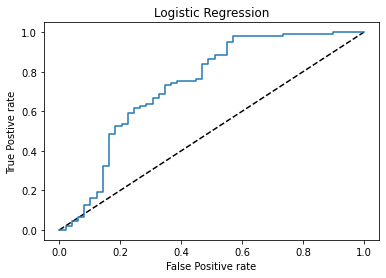

In [91]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Postive rate')
plt.title('Logistic Regression')
plt.show()


In [92]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [103]:
auc_score

0.7047619047619047

In [94]:
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

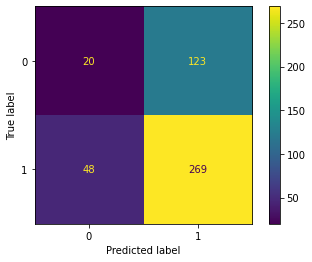

In [95]:
plot_confusion_matrix(Final_model,X_train,y_train)

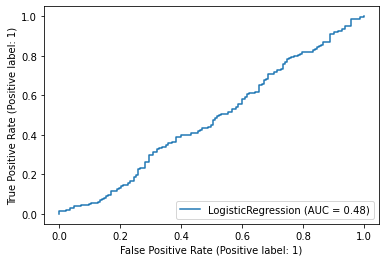

In [97]:
plot_roc_curve(Final_model,X_train,y_train)

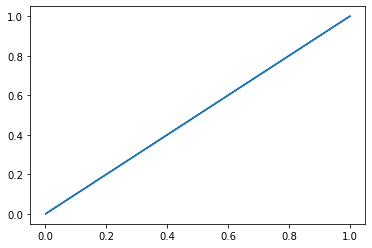

In [98]:
plt.plot(y_train,y_train)

# Step 10: Saving the model

In [100]:
## Saving the best model
import joblib 
joblib.dump(Final_model,'loan_predictionproject.pkl')

['loan_predictionproject.pkl']

In [101]:
mod = joblib.load('loan_predictionproject.pkl')

In [102]:
print(mod.predict(x_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 0 1]


# DONE